<a href="https://colab.research.google.com/github/DandyWs/Jobsheet1/blob/main/KmeansAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMAGE SEGMENTATION

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

##Membaca dan mengubah ukuran gambar
###Mengubah ukuran penting untuk mengurangi ukuran gambar dan meningkatkan kecepatan algoritme


In [ ]:
#memuat dan menormalkan gambar
img = cv2.imread("ian-dooley-d1UPkiFd04A-unsplash.jpg")/255

#Karena openCV hanya mendukung hingga nilai float32 piksel, kita harus mengetikkan data kita 
img = img.astype(np.float32)

#untuk mempertahankan warna aslinya, kita harus memuat gambar dalam RGB karena secara default OpenCV memuatnya dalam format BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#penskalaan ulang gambar diperlukan untuk mengurangi ukuran data dan mempercepat algoritme

scale_percent = 20 # persen dari ukuran asli
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)  
# menggunakan fungsi resize openCV untuk mengubah ukuran gambar dengan tepat
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

In [ ]:
img = resized

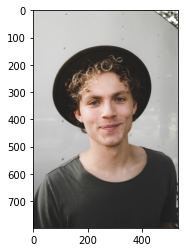

In [ ]:
plt.imshow(img)


In [ ]:
#konversi gambar MxNx3 menjadi gambar Kx3 di mana k = MxN
vectorised = img.reshape((-1,3))
#Konversi array menjadi kerangka data
img_df = pd.DataFrame(vectorised)
img_df.rename(columns={0:'R', 1:'G', 2: 'B'}, inplace =True)

In [ ]:
#mengambil centroid acak untuk pengujian awal
centroids = img_df.sample(5)
centroids

,R,G,B
106046,0.146983,0.143062,0.135219
272397,0.752941,0.752941,0.752941
376544,0.156863,0.156863,0.156863
144897,0.768243,0.600315,0.504423
5369,0.828136,0.828136,0.820293


In [ ]:
X = img_df

### Algoritma keseluruhan tetap sama dengan k-means clustering. Kali ini kami memiliki piksel Merah, Biru, dan Hijau yang disusun sebagai larik yang diratakan. Dalam bentuk ini kita dapat memperlakukannya sebagai titik data normal dan menerapkan algoritme k-means asli.

In [ ]:
k = 3
diff = 1
j=0

while(abs(diff)>0.05):
    XD=X
    i=1
    #ulangi pada setiap titik centroid 
    for index1,row_c in centroids.iterrows():
        ED=[]
        #ulangi setiap titik data
        print("Calculating distance")
        for index2,row_d in tqdm(XD.iterrows()):
            #menghitung jarak antara titik saat ini dan pusat massa
            d1=(row_c["R"]-row_d["R"])**2
            d2=(row_c["G"]-row_d["G"])**2
            d3=(row_c["B"]-row_d["B"])**2
            d=np.sqrt(d1+d2+d3)
            #tambahkan jarak dalam daftar 'ED'
            ED.append(d)
        # tambahkan jarak untuk centroid dalam bingkai data asli
        X[i]=ED
        i=i+1

    C=[]
    print("Getting Centroid")
    for index,row in tqdm(X.iterrows()):
       #dapatkan jarak dari pusat titik data saat ini
        min_dist=row[1]
        pos=1
        #loop untuk menemukan pusat terdekat ke titik saat ini
        for i in range(k):
            #jika jarak saat ini lebih besar dari centroid lainnya
            if row[i+1] < min_dist:
                #jarak yang lebih kecil menjadi jarak minimum 
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    #menugaskan cluster terdekat ke setiap titik data
    X["Cluster"]=C
    #mengelompokkan setiap cluster berdasarkan nilai rata-ratanya untuk membuat centroid baru
    centroids_new = X.groupby(["Cluster"]).mean()[["R","G", "B"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        #periksa apakah ada perbedaan antara centroid lama dan baru
        diff = (centroids_new['R'] - centroids['R']).sum() + (centroids_new['G'] - centroids['G']).sum() + (centroids_new['B'] - centroids['B']).sum()
        print(diff.sum())
    centroids = X.groupby(["Cluster"]).mean()[["R","G","B"]]


Calculating distance


424536it [00:36, 11662.75it/s]


Calculating distance


424536it [00:33, 12668.46it/s]


Calculating distance


424536it [00:33, 12653.46it/s]


Calculating distance


424536it [00:33, 12737.22it/s]


Calculating distance


424536it [00:33, 12754.92it/s]


Getting Centroid


424536it [00:27, 15546.73it/s]


Calculating distance


424536it [00:33, 12795.82it/s]


Calculating distance


424536it [00:32, 12936.57it/s]


Calculating distance


424536it [00:32, 12971.15it/s]


Getting Centroid


424536it [00:24, 16998.55it/s]


0.2905904
Calculating distance


424536it [00:34, 12132.46it/s]


Calculating distance


424536it [00:34, 12420.11it/s]


Calculating distance


424536it [00:32, 12899.24it/s]


Getting Centroid


424536it [00:24, 17098.84it/s]


0.24752532
Calculating distance


424536it [00:32, 13014.54it/s]


Calculating distance


424536it [00:32, 13010.81it/s]


Calculating distance


424536it [00:34, 12218.57it/s]


Getting Centroid


424536it [00:24, 17084.70it/s]


0.19011685
Calculating distance


424536it [00:32, 12952.20it/s]


Calculating distance


424536it [00:32, 12963.59it/s]


Calculating distance


424536it [00:32, 13095.91it/s]


Getting Centroid


424536it [00:24, 17259.94it/s]


0.115504265
Calculating distance


424536it [00:34, 12272.64it/s]


Calculating distance


424536it [00:32, 13023.06it/s]


Calculating distance


424536it [00:32, 13150.75it/s]


Getting Centroid


424536it [00:24, 17426.41it/s]


0.062353373
Calculating distance


424536it [00:32, 13223.02it/s]


Calculating distance


424536it [00:33, 12545.59it/s]


Calculating distance


424536it [00:33, 12647.18it/s]


Getting Centroid


424536it [00:24, 17352.65it/s]


0.033034056


###centroids yang kita miliki di hasil akhir

In [ ]:
centroids = centroids.to_numpy()
print(centroids)

[[0.182814   0.17519951 0.16782148]
 [0.7882031  0.7659082  0.75090736]
 [0.5737987  0.45756435 0.3875215 ]]


###Plotting dilakukan sedemikian rupa sehingga semua piksel dalam cluster tertentu ditimpa oleh centroid cluster tersebut.

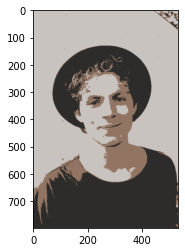

In [ ]:
labels = X["Cluster"].to_numpy()
segmented_image = centroids[labels-1]
segmented_image = segmented_image.reshape(img.shape)
plt.imshow(segmented_image)